In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Loan%20Approval%20Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df1 = df.copy()

In [4]:
df1 = df1.drop(columns = 'Loan_ID')

In [5]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df1.shape

(614, 12)

In [7]:
df1.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Numerical columns -
num_cols = df1.select_dtypes(include = 'number').columns
print(num_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [9]:
#Non-Numerical columns -
non_num_cols = df1.select_dtypes(exclude = 'number').columns
print(non_num_cols)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [10]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].median())
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].median())
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].median())

In [11]:
df1.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
print(df1['Gender'].unique())
print(df1['Married'].unique())
print(df1['Dependents'].unique())
print(df1['Self_Employed'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]


In [13]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [14]:
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
for col in non_num_cols:
    print(col , df1[col].unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [16]:
df1['Gender'] = df1['Gender'].map({'Male':0, 'Female':1})
df1['Married'] = df1['Married'].map({'No':0, 'Yes':1})
df1['Dependents'] = df1['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
df1['Education'] = df1['Education'].map({'Not Graduate':0, 'Graduate':1})
df1['Self_Employed'] = df1['Self_Employed'].map({'No':0, 'Yes':1})
df1['Property_Area'] = df1['Property_Area'].map({'Rural':0, 'Semiurban':1 , 'Urban':2})
df1['Loan_Status'] = df1['Loan_Status'].map({'N':0, 'Y':1})

In [17]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [18]:
X = df1.drop(columns = 'Loan_Status')
y = df1['Loan_Status']

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.75)

In [20]:
#Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain)

xtrainScaled = scaler.transform(xtrain)
xtestScaled = scaler.transform(xtest)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rmodelA = RandomForestClassifier(n_estimators = 100, max_depth=2)

scores = cross_val_score(rmodelA, xtrain, ytrain, cv=7)
print(scores)

print()

print("Average score" , scores.mean())

[0.78787879 0.75757576 0.83333333 0.81818182 0.8030303  0.84615385
 0.81538462]

Average score 0.8087912087912087


**Grid Search CV**

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('entropy', 'gini'), 
              'n_estimators':[10 , 100],
              'max_depth' : [2,4,6],
             'max_leaf_nodes' : [3,5,7]}


rmodelA = RandomForestClassifier()

gridModel = GridSearchCV(rmodelA, parameters)

gridModel.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [2, 4, 6], 'max_leaf_nodes': [3, 5, 7],
                         'n_estimators': [10, 100]})

In [23]:
print(gridModel.best_estimator_)

RandomForestClassifier(max_depth=4, max_leaf_nodes=5, n_estimators=10)


In [24]:
rmodelB = RandomForestClassifier(max_depth=6, max_leaf_nodes=7, n_estimators=10)

scores = cross_val_score(rmodelB, xtrain, ytrain, cv=7)
print(scores)

print()

print("Average score" , scores.mean())

[0.78787879 0.74242424 0.83333333 0.77272727 0.8030303  0.84615385
 0.81538462]

Average score 0.8001332001332001


**Random Searcg CV**

In [27]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'criterion':('entropy', 'gini'), 
              'n_estimators':[10 , 100, 200],
              'max_depth' : [2,4,6,7,9],
             'max_leaf_nodes' : [1,2,3,5,7]}


rmodelA = RandomForestClassifier()

randomModel = RandomizedSearchCV(rmodelA, parameters , cv=5, scoring='accuracy')

randomModel.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('entropy', 'gini'),
                                        'max_depth': [2, 4, 6, 7, 9],
                                        'max_leaf_nodes': [1, 2, 3, 5, 7],
                                        'n_estimators': [10, 100, 200]},
                   scoring='accuracy')

In [28]:
print(randomModel.best_estimator_)

RandomForestClassifier(max_depth=4, max_leaf_nodes=3)


In [29]:
print(randomModel.best_params_)

{'n_estimators': 100, 'max_leaf_nodes': 3, 'max_depth': 4, 'criterion': 'gini'}


In [30]:
print(randomModel.best_score_)

0.808695652173913


**Unsupervised Learning**

    - K-Means Clustering

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
d1 = np.random.randint(10,40,(7,2))
d2 = np.random.randint(35,65,(5,2))
d3 = np.random.randint(60,90,(6,2))

data = np.vstack((d1,d2,d3))
np.random.shuffle(data)
data

array([[23, 38],
       [64, 60],
       [76, 60],
       [29, 20],
       [75, 84],
       [63, 63],
       [60, 37],
       [76, 87],
       [15, 16],
       [28, 32],
       [45, 46],
       [37, 33],
       [63, 78],
       [58, 46],
       [89, 74],
       [25, 37],
       [22, 22],
       [82, 82]], dtype=int32)

In [38]:
data = pd.DataFrame(data)
data

,0,1
0,23,38
1,64,60
2,76,60
3,29,20
4,75,84
5,63,63
6,60,37
7,76,87
8,15,16
9,28,32


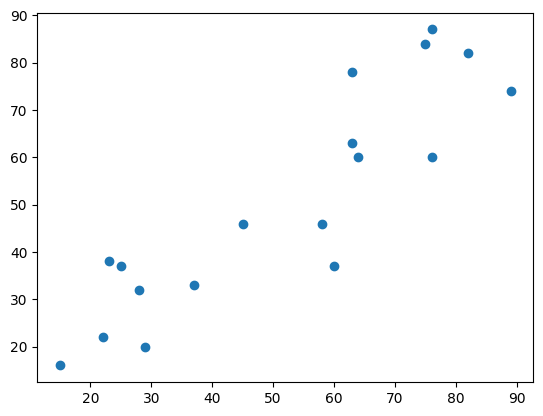

In [39]:
plt.scatter(data[0] , data[1])
plt.show()

In [43]:
cent1 = [np.random.randint(20,90),np.random.randint(20,90)]
cent2 = [np.random.randint(20,90),np.random.randint(20,90)]
cent3 = [np.random.randint(20,90),np.random.randint(20,90)]

In [44]:
print(cent1 , cent2 , cent3)

[69, 65] [73, 87] [68, 33]


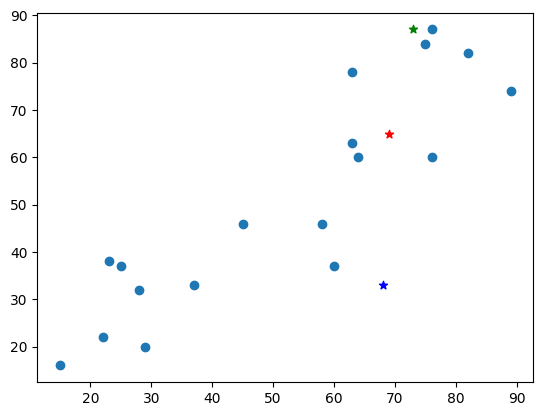

In [48]:
plt.scatter(data[0] , data[1])

plt.scatter(cent1[0] , cent1[1] , marker ='*' , c='r')
plt.scatter(cent2[0] , cent2[1] , marker ='*' , c='g')
plt.scatter(cent3[0] , cent3[1] , marker ='*' , c='b')

plt.show()

In [52]:
data['r'] = ((data[0] - cent1[0])**2 + (data[1] - cent1[1])**2)**0.5
data['g'] = ((data[0] - cent2[0])**2 + (data[1] - cent2[1])**2)**0.5
data['b'] = ((data[0] - cent3[0])**2 + (data[1] - cent3[1])**2)**0.5

In [53]:
data.head()

,0,1,r,g,b
0,23,38,53.338541,70.007142,45.276926
1,64,60,7.071068,28.460499,27.294688
2,76,60,8.602325,27.166155,28.160256
3,29,20,60.207973,80.156098,41.109610
4,75,84,19.924859,3.605551,51.478151


In [57]:
data['label'] = data[['r','g','b']].idxmin(axis=1)

In [58]:
data.head()

,0,1,r,g,b,label
0,23,38,53.338541,70.007142,45.276926,b
1,64,60,7.071068,28.460499,27.294688,r
2,76,60,8.602325,27.166155,28.160256,r
3,29,20,60.207973,80.156098,41.109610,b
4,75,84,19.924859,3.605551,51.478151,g


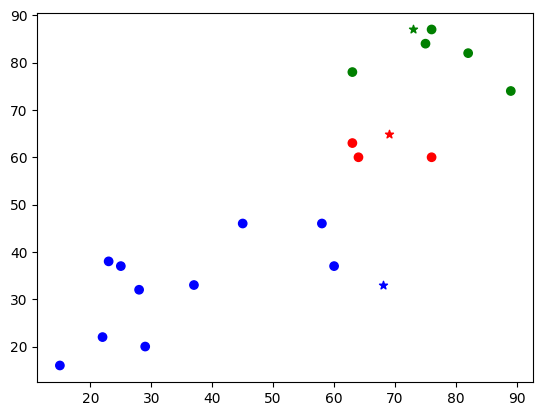

In [59]:
plt.scatter(data[0] , data[1] , c=data['label'])

plt.scatter(cent1[0] , cent1[1] , marker ='*' , c='r')
plt.scatter(cent2[0] , cent2[1] , marker ='*' , c='g')
plt.scatter(cent3[0] , cent3[1] , marker ='*' , c='b')

plt.show()

In [66]:
data.groupby('label')[[0,1]].mean().values

array([[34.2       , 32.7       ],
       [77.        , 81.        ],
       [67.66666667, 61.        ]])

In [85]:
cent1, cent2, cent3 = data.groupby('label')[[0,1]].mean().values

In [86]:
print(cent1)
print(cent2)
print(cent3)

[61. 52.]
[77. 81.]
[25.57142857 28.28571429]


In [87]:
data['r'] = ((data[0] - cent1[0])**2 + (data[1] - cent1[1])**2)**0.5
data['g'] = ((data[0] - cent2[0])**2 + (data[1] - cent2[1])**2)**0.5
data['b'] = ((data[0] - cent3[0])**2 + (data[1] - cent3[1])**2)**0.5

data['label'] = data[['r','g','b']].idxmin(axis=1)

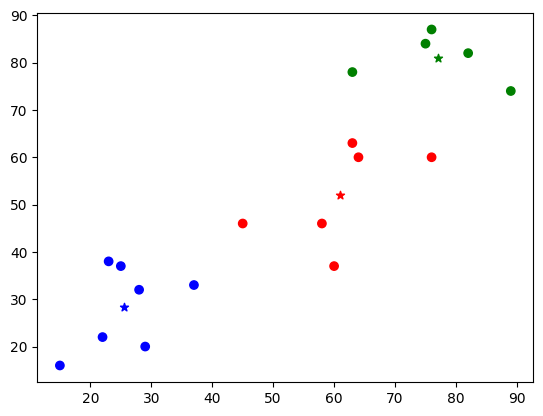

In [88]:
plt.scatter(data[0] , data[1] , c=data['label'])

plt.scatter(cent1[0] , cent1[1] , marker ='*' , c='r')
plt.scatter(cent2[0] , cent2[1] , marker ='*' , c='g')
plt.scatter(cent3[0] , cent3[1] , marker ='*' , c='b')

plt.show()

In [89]:
data

,0,1,r,g,b,label
0,23,38,40.496913,69.028979,10.048860,b
1,64,60,8.544004,24.698178,49.825205,r
2,76,60,17.000000,21.023796,59.572114,r
3,29,20,45.254834,77.620873,8.967060,b
4,75,84,34.928498,3.605551,74.479966,g
5,63,63,11.180340,22.803509,51.048796,r
6,60,37,15.033296,47.169906,35.514297,r
7,76,87,38.078866,6.082763,77.397727,g
8,15,16,58.412327,89.827613,16.207834,b
9,28,32,38.587563,69.296465,4.437778,b


**Mall Customer Segmentation**

In [90]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/mall.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
df1 = df.copy()
df1 = df1[['Age',	'Annual Income (k$)',	'Spending Score (1-100)']]
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [92]:
from sklearn.cluster import KMeans

losses = []

for k in range(1,12):
    modelA = KMeans(n_clusters = k)
    modelA.fit(df1)
    losses.append(modelA.inertia_)

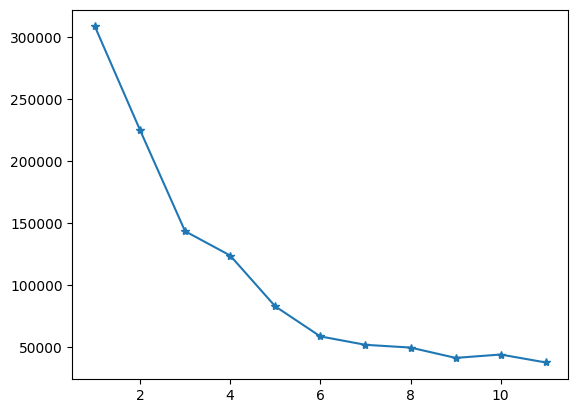

In [94]:
plt.plot(range(1,12) , losses , marker = '*')
plt.show()

In [105]:
from sklearn.cluster import KMeans
modelB = KMeans(n_clusters = 6)
modelB.fit(df1)

KMeans(n_clusters=6)

In [106]:
pd.DataFrame(modelB.cluster_centers_ , columns=df1.columns)

,Age,Annual Income (k$),Spending Score (1-100)
0,45.217391,26.304348,20.913043
1,32.785714,78.035714,81.892857
2,42.937500,55.087500,49.712500
3,40.666667,87.750000,17.583333
4,25.272727,25.727273,79.363636
5,32.454545,108.181818,82.727273


In [107]:
df2 = df1.copy()

In [108]:
df2['label'] = modelA.predict(df1)

In [109]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),label
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


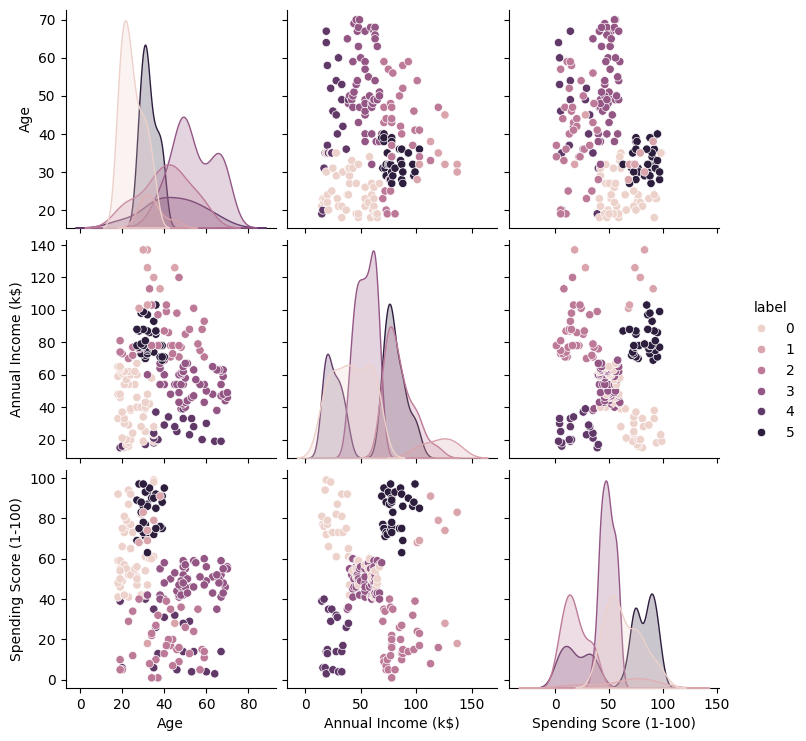

In [110]:
import seaborn as sns
sns.pairplot(df2 , hue = 'label')


In [111]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


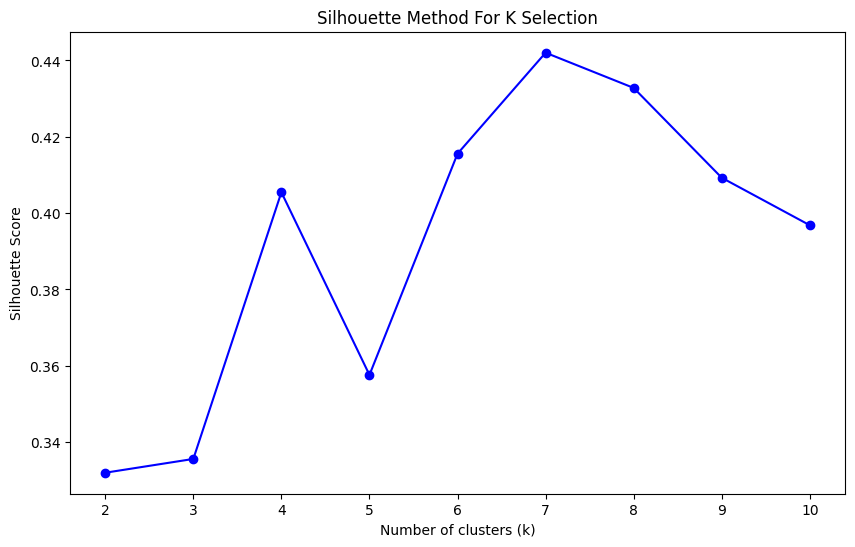

In [112]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

X = df1.copy()

# Find optimal K using silhouette scores
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For K Selection')
plt.show()

In [114]:
# Apply with optimal K
optimal_k = k_range[np.argmax(silhouette_scores)]
print(optimal_k)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

7


**DBSCAN**

In [118]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


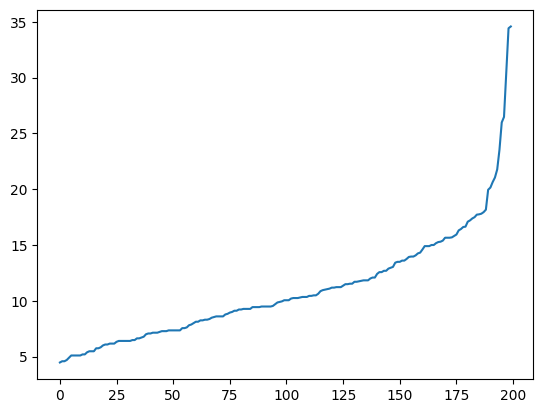

In [115]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Estimate eps parameter
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, 4])
plt.plot(distances) # Look for elbow to determine eps

In [116]:
distances

array([ 4.47213595,  4.58257569,  4.58257569,  4.69041576,  4.89897949,
        5.09901951,  5.09901951,  5.09901951,  5.09901951,  5.09901951,
        5.19615242,  5.19615242,  5.38516481,  5.47722558,  5.47722558,
        5.47722558,  5.74456265,  5.74456265,  5.83095189,  6.        ,
        6.08276253,  6.08276253,  6.164414  ,  6.164414  ,  6.164414  ,
        6.32455532,  6.40312424,  6.40312424,  6.40312424,  6.40312424,
        6.40312424,  6.40312424,  6.4807407 ,  6.4807407 ,  6.63324958,
        6.63324958,  6.70820393,  6.78232998,  7.        ,  7.07106781,
        7.07106781,  7.14142843,  7.14142843,  7.14142843,  7.21110255,
        7.28010989,  7.28010989,  7.28010989,  7.34846923,  7.34846923,
        7.34846923,  7.34846923,  7.34846923,  7.34846923,  7.54983444,
        7.54983444,  7.61577311,  7.81024968,  7.87400787,  8.        ,
        8.1240384 ,  8.1240384 ,  8.24621125,  8.24621125,  8.30662386,
        8.30662386,  8.36660027,  8.48528137,  8.54400375,  8.60

In [119]:
# Apply DBSCAN
dbscan = DBSCAN(eps=12, min_samples=5)
clusters = dbscan.fit_predict(X)

# -1 label indicates noise points
n_noise = list(clusters).count(-1)
print(f"Number of noise points: {n_noise}")

Number of noise points: 36


In [120]:
clusters

array([-1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1,  2,  0, -1,  0,  1,
        0, -1, -1,  1,  0,  2,  0,  2,  0,  1,  0,  1,  0,  2,  0,  2,  0,
        2,  0, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3, -1,  3,  0,  3, -1,  3,  4,  3, -1,  3, -1,  3,
        4,  3, -1,  3,  4,  3, -1,  3, -1,  3,  0,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3, -1,  3, -1,  3, -1,  3,  4,  3,  4,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1])

**Hierarachial clustering**

In [121]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [130]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate linkage matrix
Z = linkage(X, method='ward')

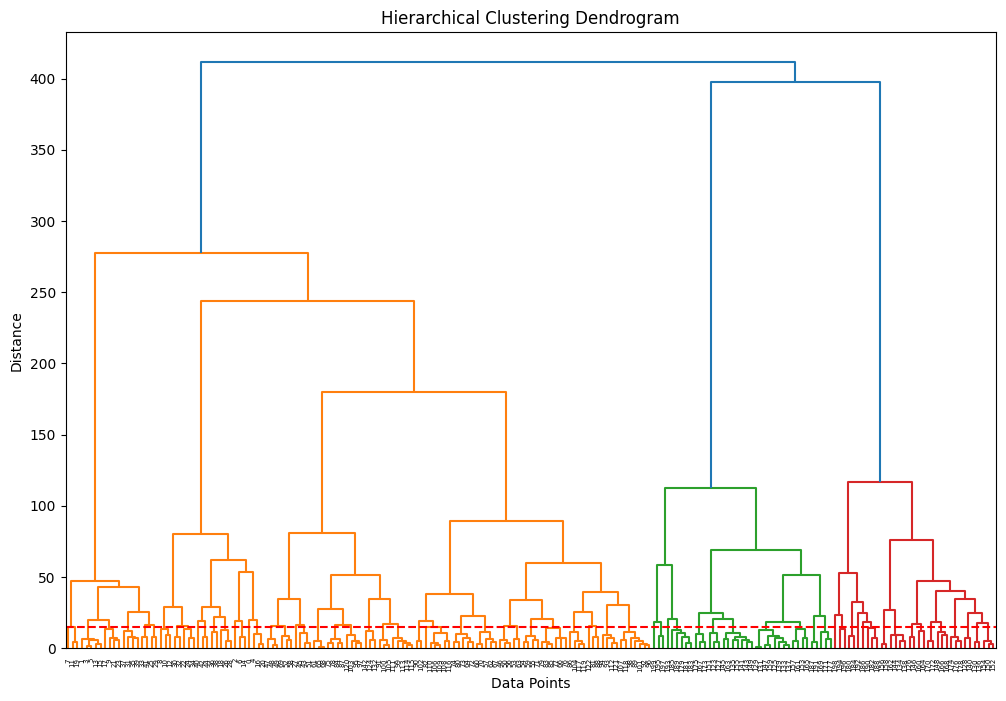

In [131]:
# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [132]:
# Cut dendrogram to get clusters
hc = AgglomerativeClustering(
n_clusters=5,
linkage='ward'
)
clusters = hc.fit_predict(X)
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])